## **Random Forest Classifier**

In [34]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
gl=pd.read_csv('glass.csv')
gl.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


### EDA

In [3]:
gl.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [4]:
gl.shape

(999, 10)

In [5]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [6]:
# printing all the values and counts for each variable

for column in gl.columns:
  print(f"Values and counts for column '{column}':")
  print(gl[column].value_counts())
  print("\n")

Values and counts for column 'RI':
RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Values and counts for column 'Na':
Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Values and counts for column 'Mg':
Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Values and counts for column 'Al':
Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Values and counts for column 'Si':
Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype

In [7]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [8]:
gl['Type'].value_counts()

,count
Type,
2.0,76
1.0,70
7.0,29
3.0,17
5.0,13
6.0,9


In [9]:
gl.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
# CHECK FOR NULL VALUES
gl.isnull().sum()

,0
RI,785
Na,785
Mg,785
Al,785
Si,785
K,785
Ca,785
Ba,785
Fe,785
Type,785


In [11]:
# Fill null values with the mean of each column
for col in gl.columns:
    if gl[col].isnull().any():
        mean_val = gl[col].mean()
        gl[col].fillna(mean_val, inplace=True)

<ipython-input-11-cce623565eb0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gl[col].fillna(mean_val, inplace=True)


In [12]:
gl.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [13]:
# Convert 'Type' column to integer
gl['Type'] = pd.to_numeric(gl['Type'], errors='coerce').round().astype('Int64')

In [14]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      999 non-null    float64
 1   Na      999 non-null    float64
 2   Mg      999 non-null    float64
 3   Al      999 non-null    float64
 4   Si      999 non-null    float64
 5   K       999 non-null    float64
 6   Ca      999 non-null    float64
 7   Ba      999 non-null    float64
 8   Fe      999 non-null    float64
 9   Type    999 non-null    Int64  
dtypes: Int64(1), float64(9)
memory usage: 79.1 KB


### Data Visualization

In [15]:
gl_num=gl.drop(['Type'],axis=1)
gl_num.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


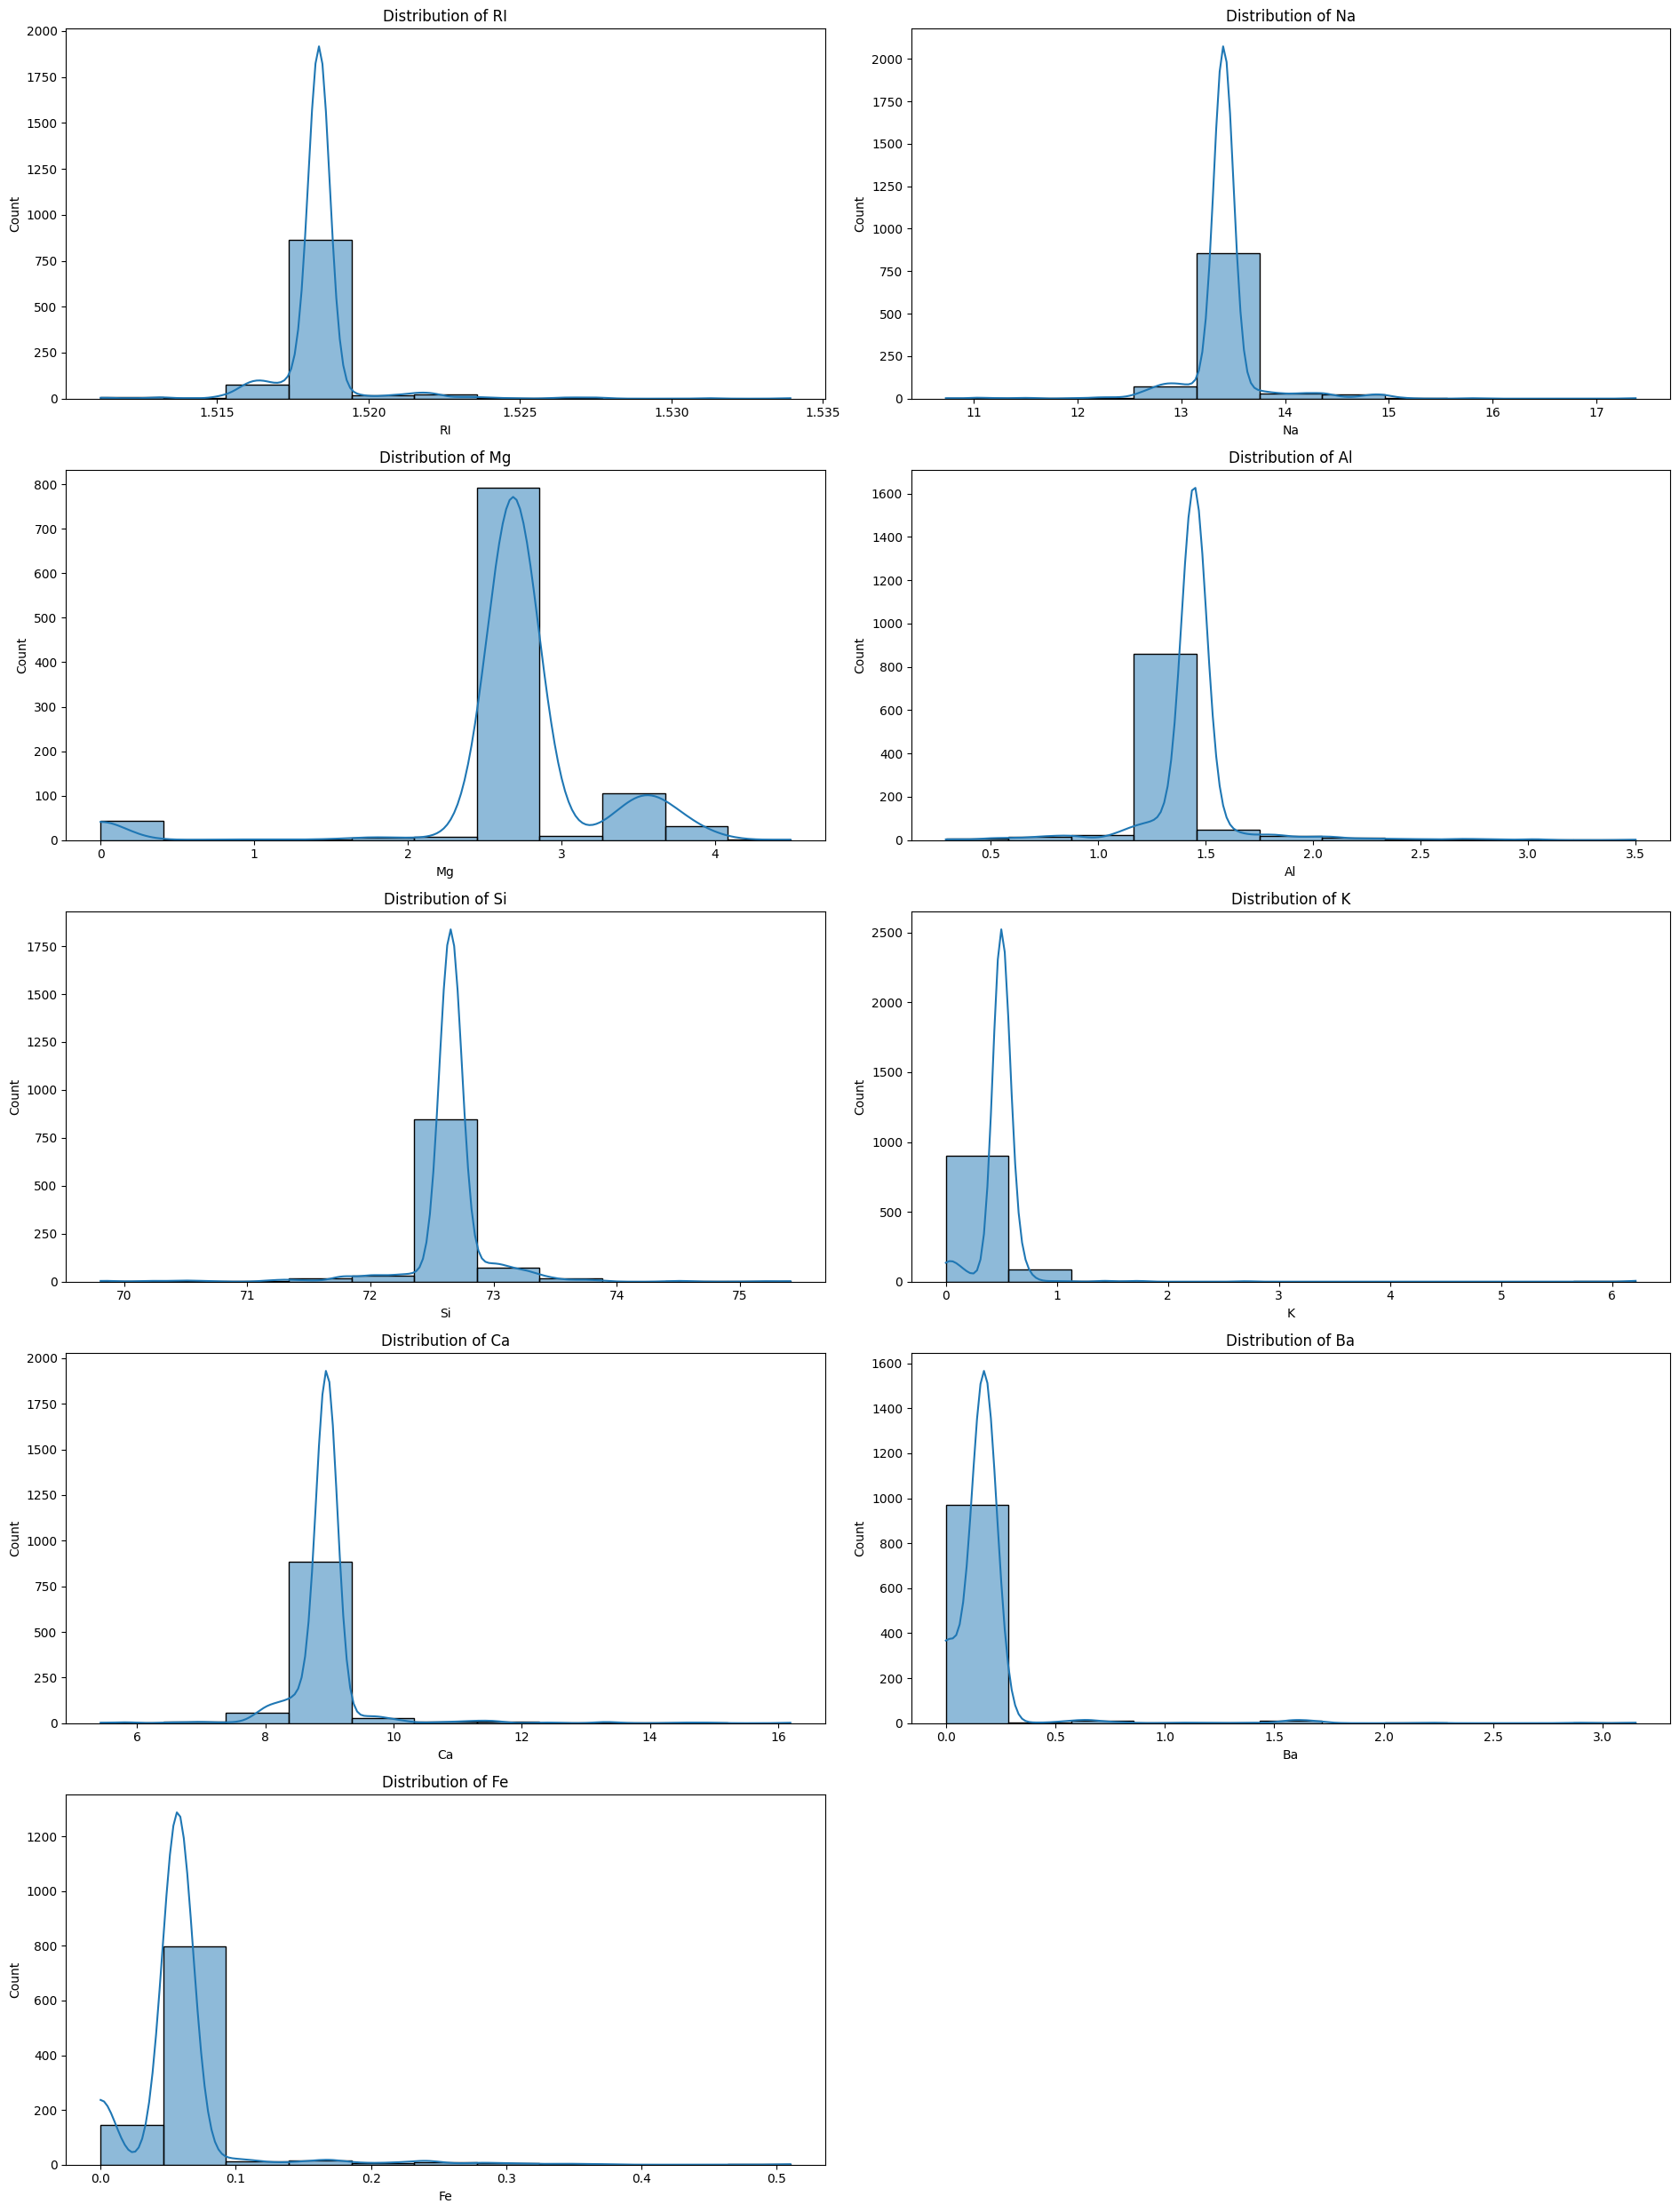

In [16]:
# histograms of all numerical variables

num_plots = len(gl_num.columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(19, 5 * num_rows))

for i, col in enumerate(gl_num.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(gl_num[col], kde=True)  # Plot histogram with KDE trend line
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

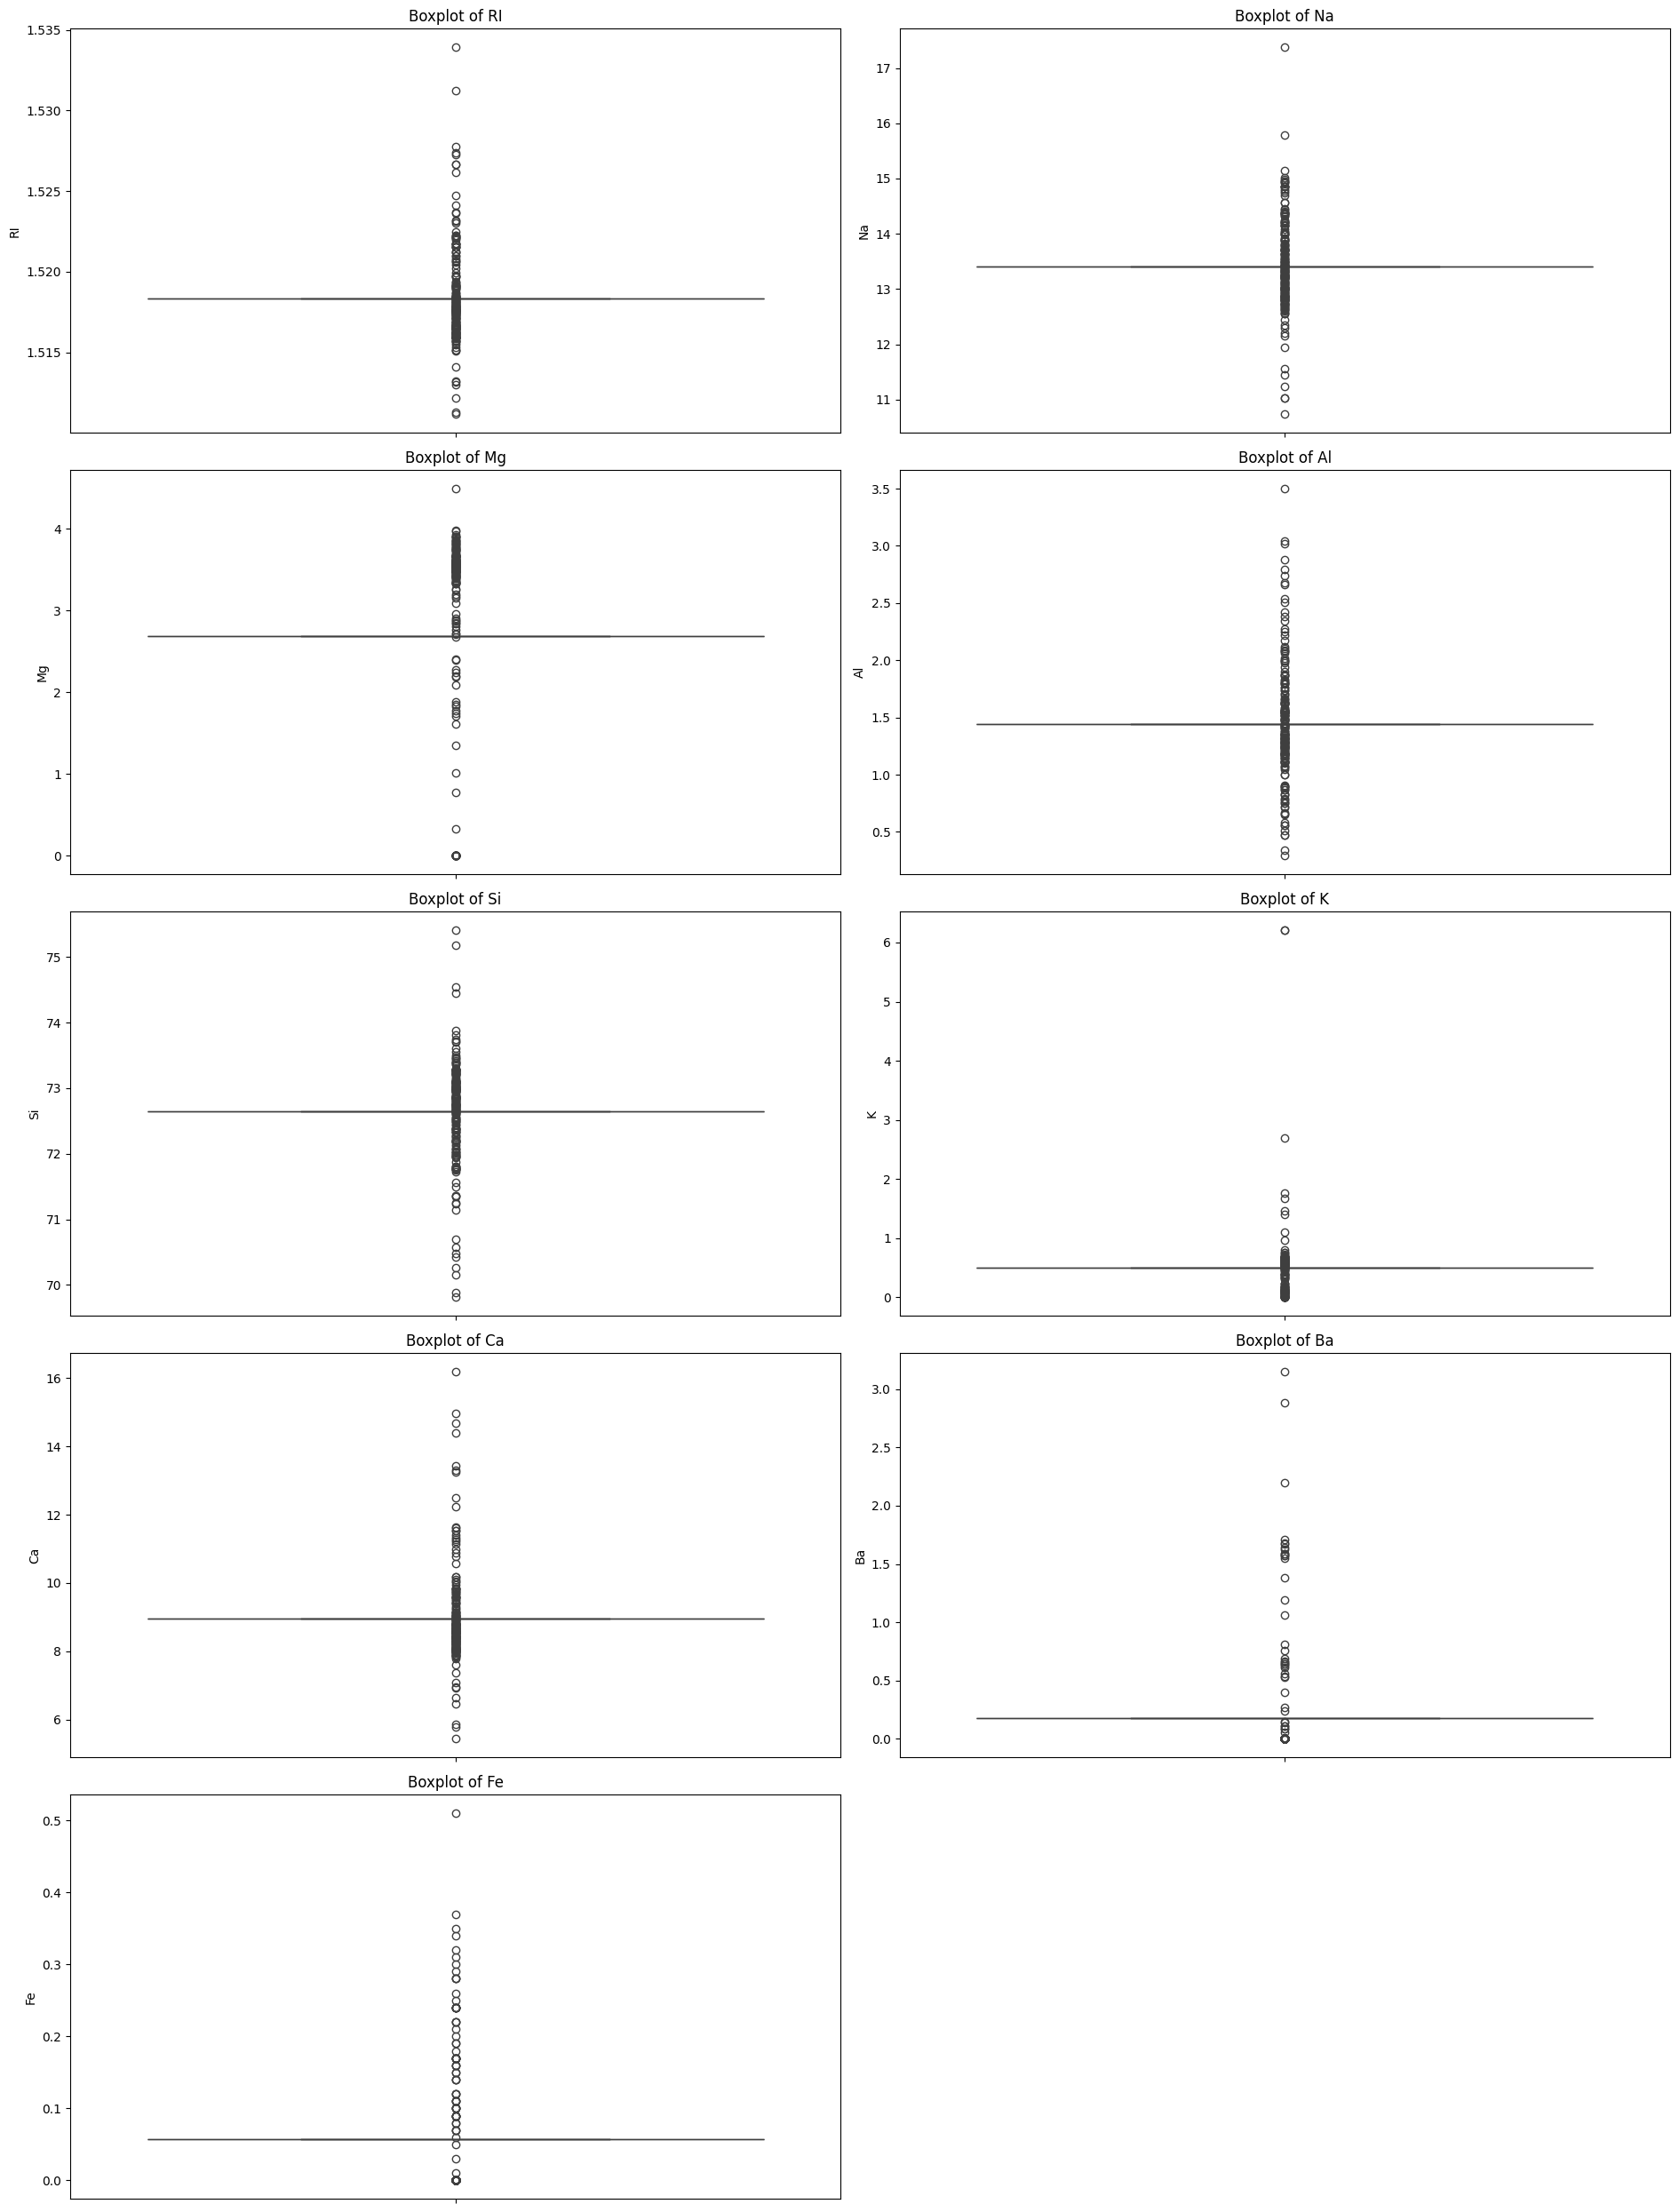

In [23]:
# boxplots of all variables of gl_num

num_plots = len(gl_num.columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(19, 5 * num_rows))

for i, col in enumerate(gl_num.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=gl_num[col])  # Plot boxplot
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [24]:
#  remove the outliers

def remove_outliers_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply capping to each numerical column
for col in gl_num.columns:
  gl_num = remove_outliers_capping(gl_num, col)

# Now gl_num contains the data with outliers removed using the capping method.


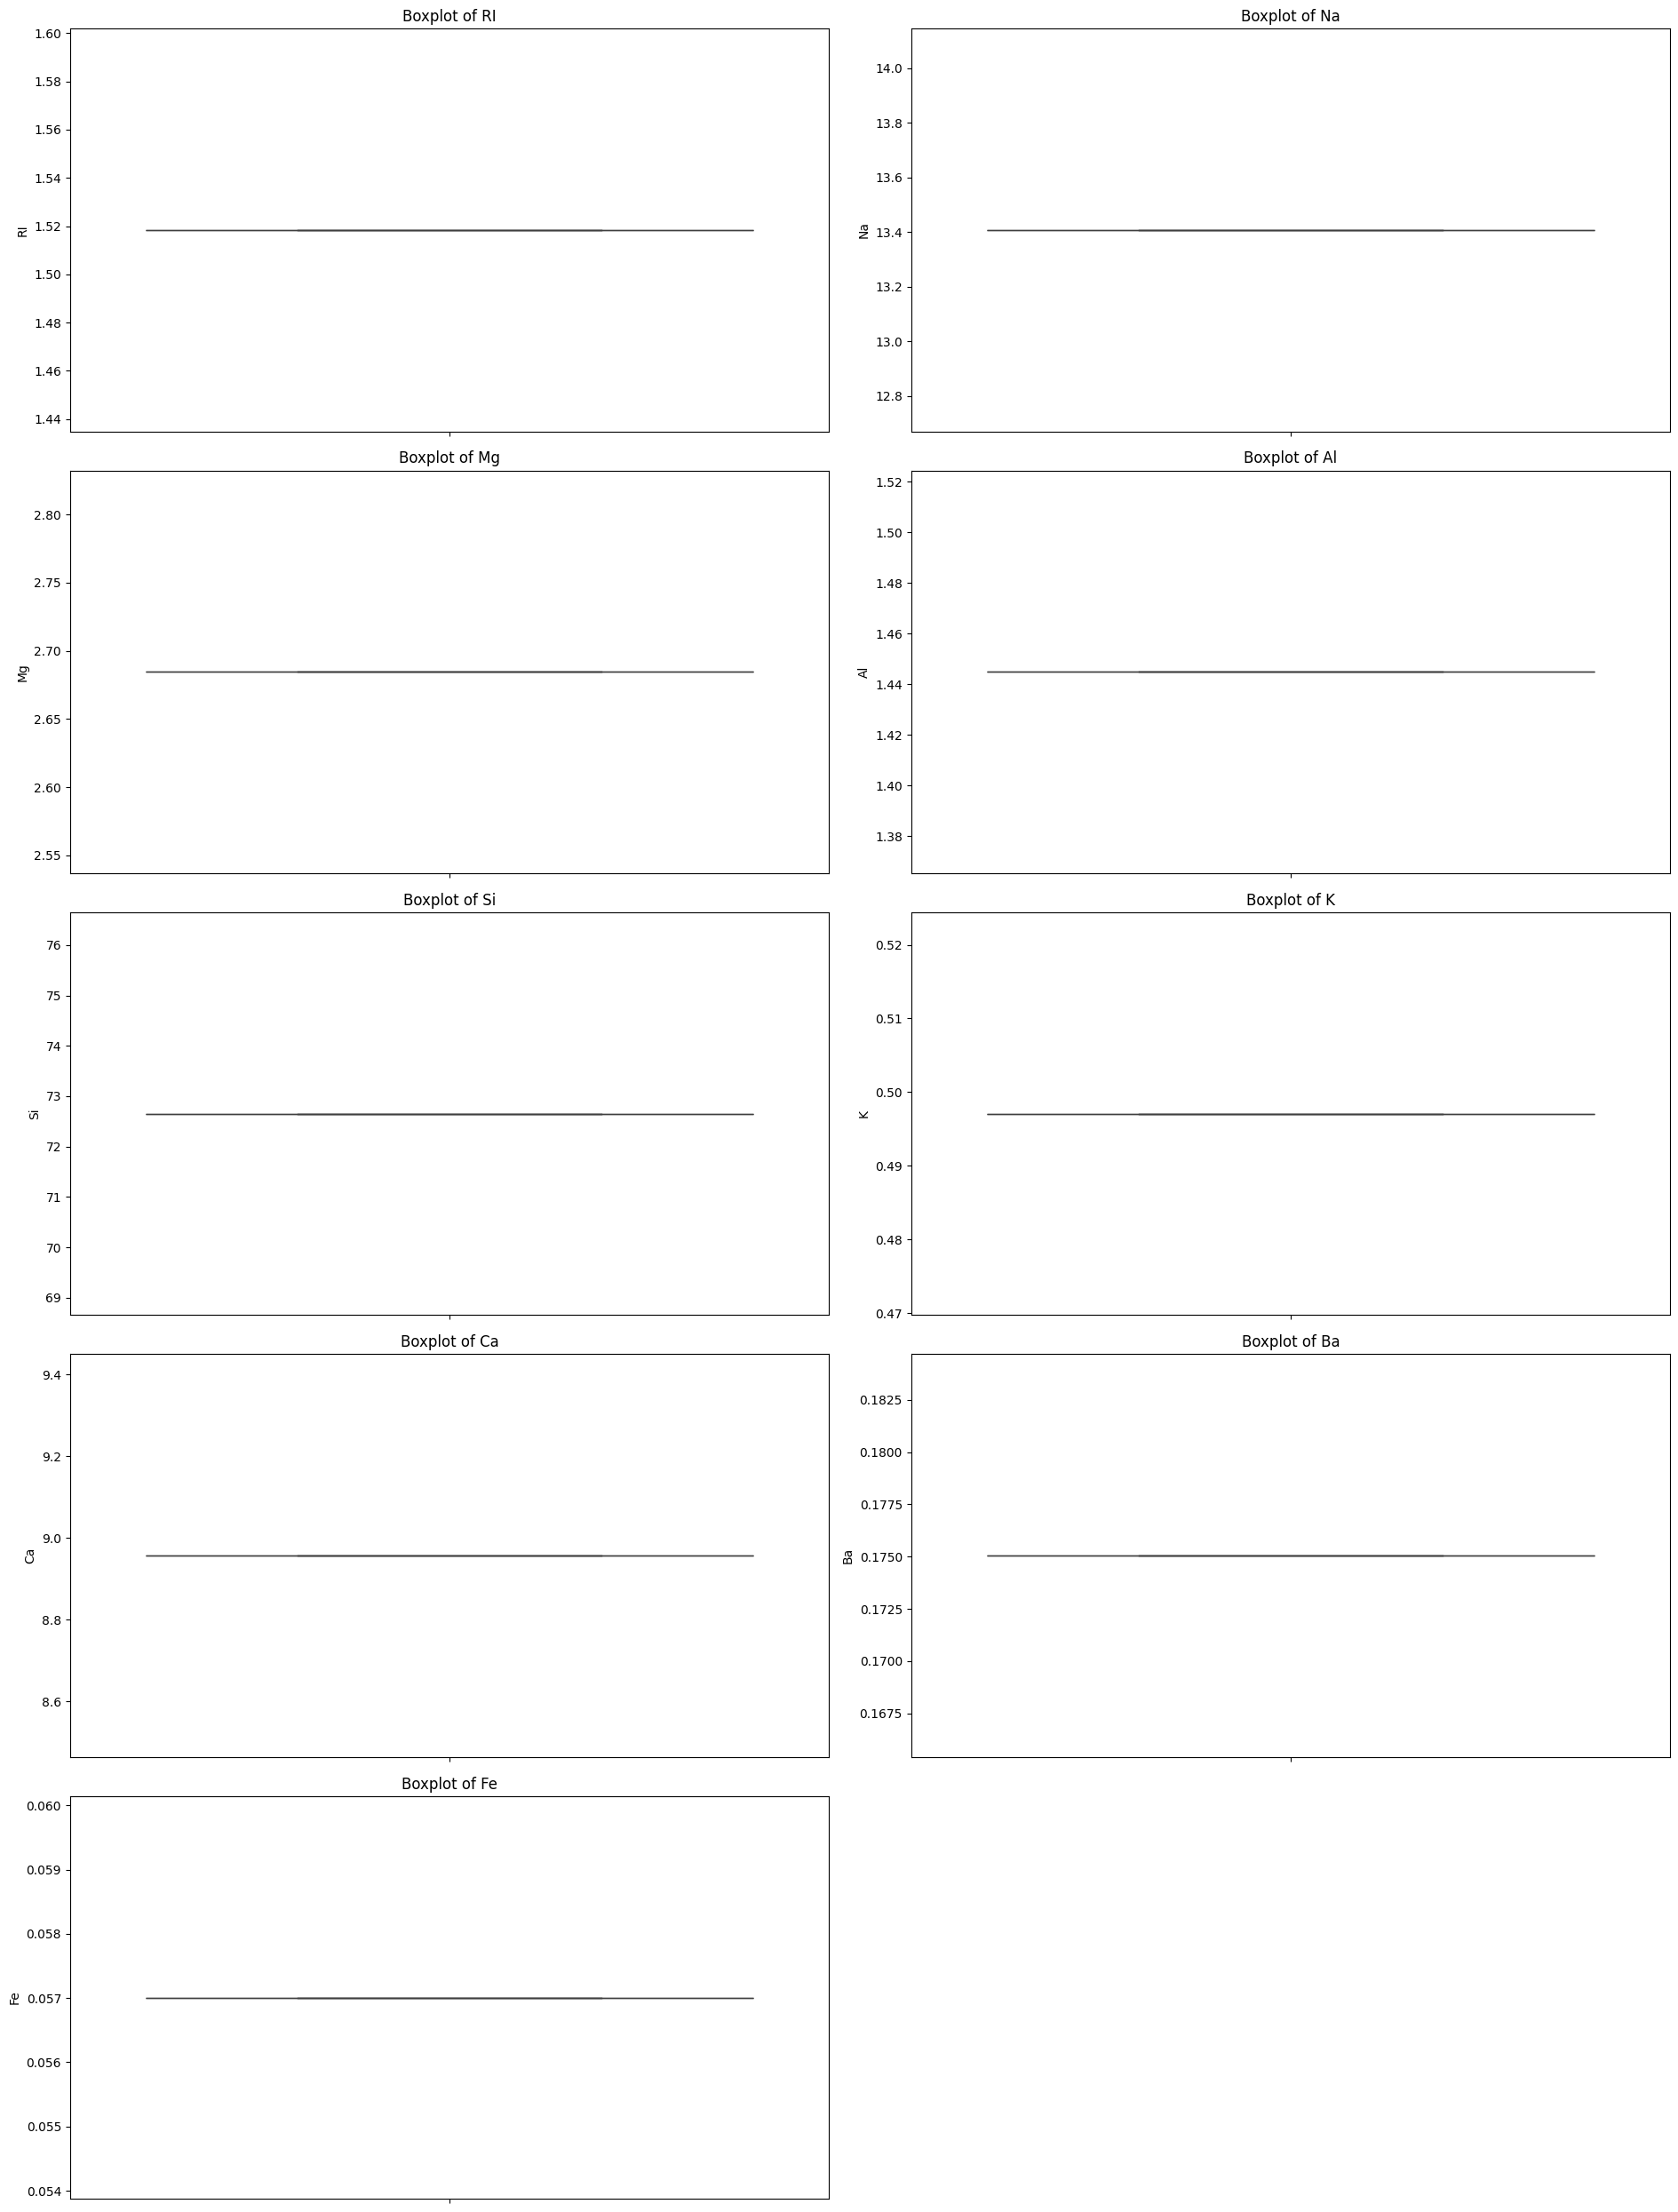

In [25]:
# Boxplot to check further outliers
num_plots = len(gl_num.columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(19, 5 * num_rows))

for i, col in enumerate(gl_num.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=gl_num[col])  # Plot boxplot
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [35]:
# classification report after removing ouliers

from sklearn.metrics import classification_report
print('MODEL REPORT AFTER REMOVING OUTLIERS')
print(classification_report(Y_test, Y_pred_test))

MODEL REPORT AFTER REMOVING OUTLIERS
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        18
         3.0       0.78      1.00      0.88       156
         5.0       0.00      0.00      0.00         5
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         8

    accuracy                           0.78       200
   macro avg       0.13      0.17      0.15       200
weighted avg       0.61      0.78      0.68       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The model is underperforming when removing outliers. So keeping outliers for better model performance.

### Data Preprocessing

In [17]:
# standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X  = SS.fit_transform(gl_num)
X  = pd.DataFrame(X)
X.columns= list(gl_num)


### Data Partiton and Model Fitting

In [18]:
# Define X and Y
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.885924,0.615672,2.710781,-1.496095,-2.435182,-1.451292,-0.314944,-0.762428,-1.26709
1,-0.538712,1.278685,1.374509,-0.368298,0.221071,-0.056637,-1.714947,-0.762428,-1.26709
2,-1.558485,0.323947,1.299438,0.412485,0.948046,-0.355491,-1.791034,-0.762428,-1.26709
3,-0.503055,-0.524709,1.509638,-0.671935,-0.114455,0.242218,-1.121467,-0.762428,-1.26709
4,-0.674206,-0.365586,1.404538,-0.888820,1.199691,0.175806,-1.349729,-0.762428,-1.26709


In [19]:
X.shape

(999, 9)

In [20]:
Y=gl['Type']
Y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [21]:
Y.shape

(999,)

In [22]:
## RANDOM FOREST CLASSIFIER
#-----------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_samples=0.7,
                        max_features=0.9,
                        n_estimators = 100, random_state=100)



In [23]:
# cross validation
from sklearn.metrics import accuracy_score
training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))


In [24]:
# cross validation accuracies
print("RF-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("RF-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

RF-CV-training accuracy:  1.0
RF-CV-test accuracy:  0.95
variance 0.05


In [25]:
# classification report (RANDOM FOREST CLASSIFIER)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

         1.0       0.69      0.75      0.72        12
         2.0       0.71      0.83      0.77        18
         3.0       1.00      0.97      0.99       156
         5.0       1.00      0.60      0.75         5
         6.0       1.00      1.00      1.00         1
         7.0       0.70      0.88      0.78         8

    accuracy                           0.94       200
   macro avg       0.85      0.84      0.83       200
weighted avg       0.94      0.94      0.94       200



In [42]:
## BAGGING CLASSIFIER
#-----------------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(estimator=RandomForestClassifier(max_samples=0.7),
                          max_features=0.9,
                          n_estimators = 100, random_state=100)


In [46]:
# cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
training_acc = []
test_acc = []

for i in range(1,51):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Bagging-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("Bagging-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Bagging-CV-training accuracy:  0.99
Bagging-CV-test accuracy:  0.95
variance 0.04


In [47]:
# classification report (BAGGING CLASSIFIER)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

         1.0       0.75      0.75      0.75        16
         2.0       0.62      0.77      0.69        13
         3.0       1.00      0.99      0.99       167
         5.0       1.00      1.00      1.00         1
         6.0       0.00      0.00      0.00         1
         7.0       1.00      1.00      1.00         2

    accuracy                           0.95       200
   macro avg       0.73      0.75      0.74       200
weighted avg       0.95      0.95      0.95       200



In [40]:
# GRADIENTBOOSTING CLASSIFIER
#------------------------------------------------------------------

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,51):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_features=0.9,max_depth=9)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("GBC-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("GBC-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

GBC-CV-training accuracy:  1.0
GBC-CV-test accuracy:  0.94
variance 0.06


In [41]:
# classification report (GRADIENTBOOSTING CLASSIFIER)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))


              precision    recall  f1-score   support

         1.0       0.92      0.69      0.79        16
         2.0       0.63      0.92      0.75        13
         3.0       0.99      0.99      0.99       167
         5.0       1.00      1.00      1.00         1
         6.0       0.00      0.00      0.00         1
         7.0       1.00      1.00      1.00         2

    accuracy                           0.95       200
   macro avg       0.76      0.77      0.75       200
weighted avg       0.96      0.95      0.95       200



In [37]:
# ADABOOSTING CLASSIFIER
#------------------------------------------------------------------

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2, random_state=i)
    model = AdaBoostClassifier(n_estimators=200,learning_rate=0.1)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("ABR-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("ABR-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

ABR-CV-training accuracy:  0.9
ABR-CV-test accuracy:  0.88
variance 0.01


In [38]:
# classification report (ADABOOSTING CLASSIFIER)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

         1.0       0.39      0.75      0.51        12
         2.0       0.44      0.22      0.30        18
         3.0       0.97      0.98      0.97       156
         5.0       0.00      0.00      0.00         5
         6.0       1.00      1.00      1.00         1
         7.0       0.78      0.88      0.82         8

    accuracy                           0.87       200
   macro avg       0.60      0.64      0.60       200
weighted avg       0.85      0.87      0.86       200




1. Explain Bagging and Boosting methods. How is it different from each other.

**1) Bagging (Bootstrap Aggregating)**

**How It Works:**

Bagging creates multiple subsets of the training data by sampling with replacement (bootstrapping).
A model (e.g., decision tree) is trained independently on each subset.
The predictions from all models are combined:
For regression: Averaging predictions.
For classification: Majority voting.

**Goal:**

Reduce variance: By averaging multiple models, bagging reduces overfitting.

**Examples:**

Random Forest: An ensemble of decision trees built using bagging.

**Key Characteristics:**

Models are trained independently.
Reduces overfitting by averaging predictions.
Works well with high-variance, low-bias models (e.g., decision trees).

**2) Boosting**

**How It Works:**

Boosting builds models sequentially, where each new model focuses on correcting the errors of the previous ones.
Data points misclassified in earlier models are given higher weights in subsequent models.
The final prediction is a weighted combination of all models.

**Goal:**

Reduce bias: By focusing on errors, boosting improves the overall predictive power.

**Examples:**

AdaBoost (Adaptive Boosting)
Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)

**Key Characteristics:**

Models are trained sequentially.
Emphasizes difficult-to-predict examples.
Works well with low-variance, high-bias models (e.g., shallow decision trees).





2. Explain how to handle imbalance in the data.

**1. Resampling Techniques**

a) Oversampling
b) Undersampling
c) Combination of Oversampling and Undersampling

**2. Algorithm-Level Solutions**

a) Use Algorithms That Handle Class Imbalance
b) Custom Loss Functions

**3. Evaluation Metrics for Imbalanced Data**

Precision, Recall, F1-score
ROC-AUC Score
PR (Precision-Recall) Curve

**4. Data Augmentation**

**5. Ensemble Methods**

**6. Collect More Data**

**7. Anomaly Detection for Extreme Imbalances**
